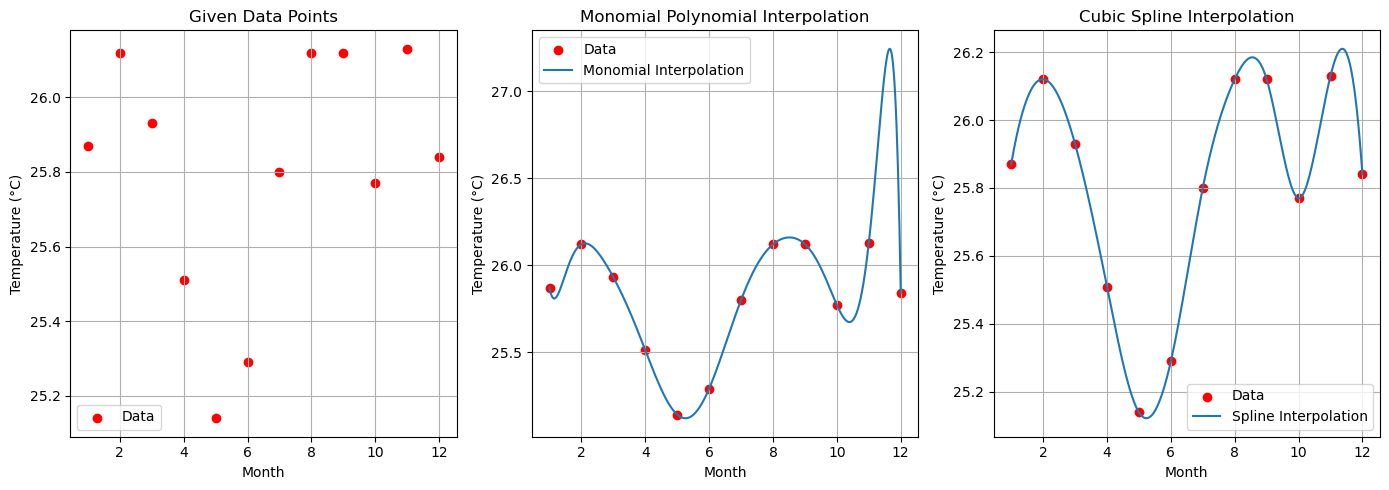

In [7]:
# Reusing the provided code to perform and plot polynomial interpolation using monomial base functions
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline

# Provided temperature data for each month in 2006 in Peru
months = np.arange(1, 13)
temperatures = np.array([25.87, 26.12, 25.93, 25.51, 25.14, 25.29, 25.8, 26.12, 26.12, 25.77, 26.13, 25.84])

# Construct the Vandermonde matrix for the monomial base
n = len(months)
BaseMatrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        BaseMatrix[i, j] = months[i]**j

# Solve the linear system to find the coefficients
coefs = np.linalg.solve(BaseMatrix, temperatures)

# Generate a range of x values for plotting the interpolation
dense_months = np.linspace(1, 12, 500)
interpolated_temperatures = np.zeros_like(dense_months)

# Compute the interpolated y values
for i in range(n):
    interpolated_temperatures += coefs[i] * dense_months**i

# Plot the original temperature data
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.scatter(months, temperatures, color='red', label='Data')
plt.title('Given Data Points')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()

# Plot the polynomial interpolation using monomial base functions
plt.subplot(1, 3, 2)
plt.scatter(months, temperatures, color='red', label='Data')
plt.plot(dense_months, interpolated_temperatures, label='Monomial Interpolation')
plt.title('Monomial Polynomial Interpolation')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()

# c) Perform spline interpolation and plot interpolation function (optional)
# We'll use a cubic spline interpolation which is a common choice
cs = CubicSpline(months, temperatures)

# Plotting the spline interpolation
plt.subplot(1, 3, 3)
plt.scatter(months, temperatures, color='red', label='Data')
plt.plot(dense_months, cs(dense_months), label='Spline Interpolation')
plt.title('Cubic Spline Interpolation')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()
